# Importing libraries

In [106]:
import pandas as pd
import numpy as np
import statistics
import seaborn  as sns
import matplotlib.pyplot as plt

# Model
from sklearn.linear_model import LinearRegression

# Hypothesis Test
from scipy import stats as st
from bioinfokit.analys import stat # pip install bioinfokit
import statsmodels.api as sm




# Tast 1

## Reading 1st dataset

In [265]:
dataset_1 = pd.read_csv("common-health-problems-of-students-examined-defective-vision-annual.csv")

## Dataset Exploration

In [266]:
len(dataset_1)

24

In [267]:
dataset_1.shape

(24, 3)

In [268]:
dataset_1.head()

,year,gender,per_10000_examined
0,2009,Male,5368
1,2009,Female,5775
2,2010,Male,5349
3,2010,Female,5762
4,2011,Male,5339


In [269]:
dataset_1.describe()

,year,per_10000_examined
count,24.000000,24.000000
mean,2014.500000,5289.958333
std,3.526299,322.549286
min,2009.000000,4702.000000
25%,2011.750000,5140.000000
50%,2014.500000,5284.000000
75%,2017.250000,5568.000000
max,2020.000000,5775.000000


In [270]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                24 non-null     int64 
 1   gender              24 non-null     object
 2   per_10000_examined  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


## Part (a) : Time Series plot

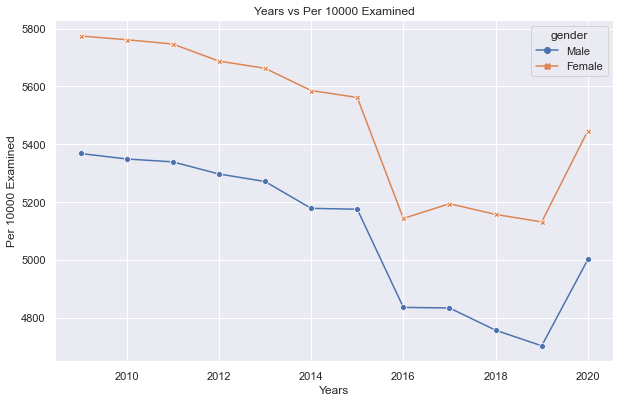

In [271]:
fig = sns.lineplot(data=dataset_1, 
             x="year", 
             y="per_10000_examined", 
             hue="gender",
             style="gender",
             markers=True, 
             dashes=False)

plt.xlabel("Years")
plt.ylabel("Per 10000 Examined")
plt.title("Years vs Per 10000 Examined") # You can comment this line out if you don't need title
plt.savefig('Time Series Plot of Dataset 1.png', format='png')
plt.show(fig)

We can see from above Line plot that defective vision rate is higher in females as compared to males. From 2009 to 2013 male defective vision rate is in between 5250 - 5375 while its female counterpart rate is beyond the range of 5375 - 5750 and beyond.However, from 2014 onward defective vision rate has decreased dramatically for both male and female.



## Part (a) : Bar Plot

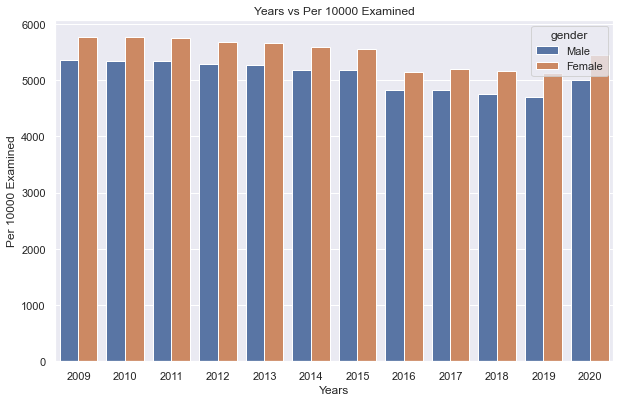

In [272]:
fig = sns.barplot(data=dataset_1,
            x="year", 
            y="per_10000_examined", 
            hue="gender",
            ci=100)


plt.xlabel("Years")
plt.ylabel("Per 10000 Examined")
plt.title("Years vs Per 10000 Examined") # You can comment this line out if you don't need title
plt.savefig('Bar Plot of Dataset 1.png', format='png')
plt.show(fig)

We can see from the above bar plots that female defective vision rate is higher as compared to male and the rate decreases for both genders in approx linear fashion. In 2020, male detective rate decreased to 5000 from approx 5500 and while on the other side, female defective vision rate kept on decreasing from 5750 to approx 5250 till 2019 but got a sudden hike in 2020 having defective rate of approx 5500.

## Part (a) : Box Plot

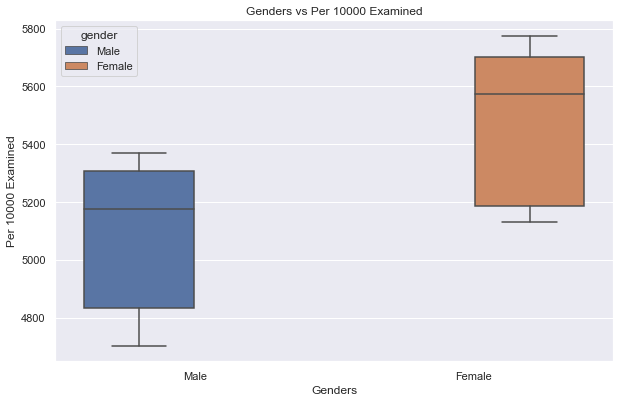

In [273]:
fig = sns.boxplot(data=dataset_1,
            x = "gender",
            y = "per_10000_examined",
            hue = "gender")

plt.xlabel("Genders")
plt.ylabel("Per 10000 Examined")
plt.title("Genders vs Per 10000 Examined") # You can comment this line out if you don't need title
plt.savefig('Box Plot of Dataset 1.png', format='png')
plt.show(fig)

We can see from the box plots that median of female defective rate is greater than the male defective vision rate. The interquartile ranges are reasonably similar, and also dataset is dispersion is similar for both male and female. Though both batches of data appear to be left-skewed.

### Converting gender to numerical datatype

In [282]:
dataset_1.head()

,year,gender,per_10000_examined
0,2009,0,5368
1,2009,1,5775
2,2010,0,5349
3,2010,1,5762
4,2011,0,5339


In [275]:
dataset_1["gender"] = np.where(dataset_1["gender"].str.contains("Male"), 0, 1)

In [334]:
dataset_1.head()

,year,gender,per_10000_examined
0,2009,0,5368
1,2009,1,5775
2,2010,0,5349
3,2010,1,5762
4,2011,0,5339


## Part (b) : Linear Regression Model 

In [277]:
# Buidling linear regression model
model = LinearRegression()

# Separating predictors and regressand
X = dataset_1.drop(["per_10000_examined"],axis=1)
Y = dataset_1["per_10000_examined"]

# Fitting the model
model.fit(X, Y)

LinearRegression()

### Slopts and Intercepts

In [278]:
print("Slopess => Year (Coeff) :",model.coef_[0]," and Gender (Coeff) : ",model.coef_[1])
print("Intercept: ",model.intercept_)

Slopess => Year (Coeff) : -61.26398601398603  and Gender (Coeff) :  395.9166666666668
Intercept:  128508.29982517485


### Predicting using Predict and Model Equation

In [279]:
# Creating data for testing
test = {'year': [2021,2021], 'gender': [0,1]}
test = pd.DataFrame(data=test)
test

,year,gender
0,2021,0
1,2021,1


In [280]:
# Predicting using trained model
predictions = model.predict(test)
predictions

array([4693.78409091, 5089.70075758])

In [281]:
# Predicting using model equations
intercept = model.intercept_
year_slope = model.coef_[0]
gender_slope =  model.coef_[1]


prediction_1 = year_slope * test.iloc[0,0] + gender_slope * test.iloc[0,1] + intercept
prediction_1
prediction_2 = year_slope * test.iloc[1,0] + gender_slope * test.iloc[1,1] + intercept
prediction_2

print(prediction_1," ",prediction_2)

4693.784090909088   5089.70075757576


We can see that predicting through trained model or through model equation gives us the save result

### Plott of Regression Line

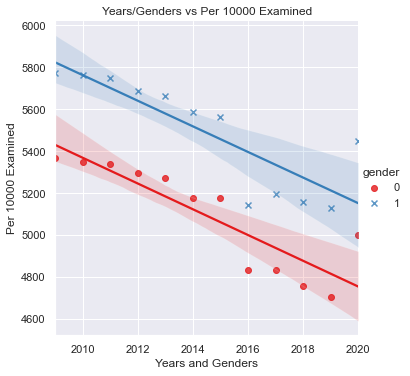

In [284]:
fig = sns.lmplot(x="year", y="per_10000_examined", hue="gender", data=dataset_1,
           markers=["o", "x"], palette="Set1");


plt.xlabel("Years and Genders")
plt.ylabel("Per 10000 Examined")
plt.title("Years/Genders vs Per 10000 Examined") # You can comment this line out if you don't need title
plt.savefig('Regression Line Plot of Dataset 1.png', format='png')
plt.show(fig)

# Tast 2

## Reading 1st dataset

In [285]:
dataset_2 = pd.read_csv("dental-index-dental-health-status-of-the-school-children-at-12-and-15-years-old.csv")

## Dataset Exploration

In [286]:
len(dataset_2)

36

In [287]:
dataset_2.shape

(36, 3)

In [336]:
dataset_2.head()

,year,age,dental_index
0,2003,12,0.74
1,2003,15,1.14
2,2004,12,0.73
3,2004,15,1.07
4,2005,12,0.77


In [289]:
dataset_2.describe()

,year,dental_index
count,36.000000,36.000000
mean,2011.500000,0.766111
std,5.261722,0.270072
min,2003.000000,0.350000
25%,2007.000000,0.547500
50%,2011.500000,0.750000
75%,2016.000000,1.055000
max,2020.000000,1.190000


In [290]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          36 non-null     int64  
 1   age           36 non-null     object 
 2   dental_index  36 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 992.0+ bytes


## Part (a) (Time Series plot)

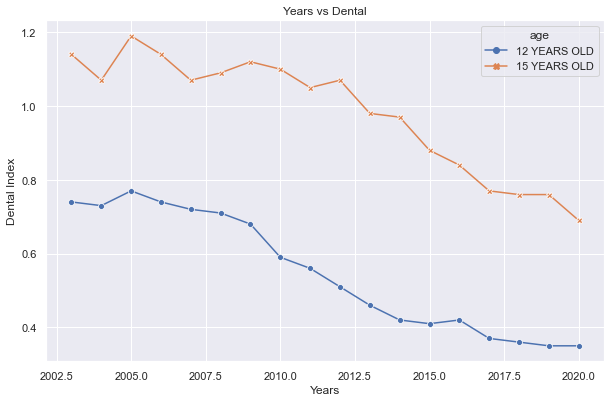

In [291]:
fig = sns.lineplot(data=dataset_2, 
             x="year", 
             y="dental_index", 
             hue="age",
             style="age",
             markers=True, 
             dashes=False)

plt.xlabel("Years")
plt.ylabel("Dental Index")
plt.title("Years vs Dental") # You can comment this line out if you don't need title
plt.savefig('Time Series of Dataset 2.png', format='png')
plt.show(fig)

We can see from the above time series plot that from 2003-2020 the dental index has been decreasing from approx 0.75 to 0.4 for 12 years old kids and the dental index ratio has been decreasing from approx 0.1.5 to 0.69 for 15 years old kids, however, the 12 year index changed to approx 0.20 quite dramatically after year 2009 while dental index decreased very slowly.

## Part (a) : Bar Plot

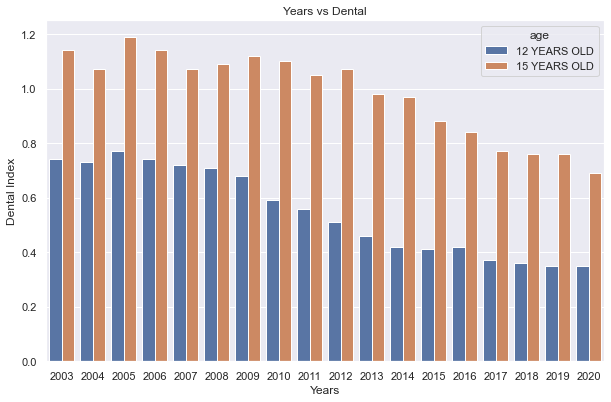

In [292]:
sns.set(rc={'figure.figsize':(10,6.27)})
fig = sns.barplot(data=dataset_2,
            x="year", 
            y="dental_index", 
            hue="age",
            ci=100)


plt.xlabel("Years")
plt.ylabel("Dental Index")
plt.title("Years vs Dental") # You can comment this line out if you don't need title
plt.savefig('Bar Plot of Dataset 2.png', format='png')
plt.show(fig)

We can see from the above bar plots that 12 year kids dental index ratio is higher as compared to 15 yer kids dental index and the index decreases for both genders in approx linear fashion. In 2020, 12 years old dental index decreased to approx 0.35 from approx 0.75 while on the other side, 15 year old dentalindex kept the same behavior as of 12 year.

## Part (a) : Box Plot

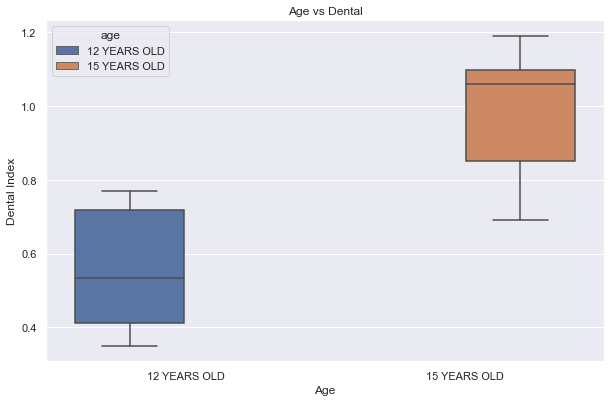

In [294]:
fig = sns.boxplot(data=dataset_2,
            x = "age",
            y = "dental_index",
            hue = "age")


plt.xlabel("Age")
plt.ylabel("Dental Index")
plt.title("Age vs Dental") # You can comment this line out if you don't need title
plt.savefig('Box Plot of Dataset 2.png', format='png')
plt.show(fig)

We can see from the box plots that median of 15 years old dental index is greater than the 12 years old dental index. The interquartile ranges are different but dataset is dispersion is similar for both male and female. The 12 years old batch appears to be left-skewed while 15 years old batch appears to be right-skewed.

### Converting age to numerical datatype

In [297]:
dataset_2.head()

,year,age,dental_index
0,2003,12,0.74
1,2003,15,1.14
2,2004,12,0.73
3,2004,15,1.07
4,2005,12,0.77


In [296]:
dataset_2["age"] = np.where(dataset_2["age"].str.contains("12 YEARS OLD"), 12, 15)

In [299]:
dataset_2.head()

,year,age,dental_index
0,2003,12,0.74
1,2003,15,1.14
2,2004,12,0.73
3,2004,15,1.07
4,2005,12,0.77


### Separating dental index values for both ages

In [300]:
# 1st group (12 years old)
year_12 = dataset_2[(dataset_2['age'] == 12)]["dental_index"]

# 2nd group (15 yeras old)
year_15 = dataset_2[(dataset_2['age'] == 15)]["dental_index"]

## Performing T Test

In [301]:
st.ttest_ind(a=year_12, b=year_15, equal_var=True)


Ttest_indResult(statistic=-8.160443476623612, pvalue=1.6147771147697633e-09)

In [302]:
# t test using bioinfokit
res = stat()
# for unequal variance t-test (Welch's t-test) set evar=False
res.ttest(df=dataset_2, xfac="age", res="dental_index", test_type=2)
print(res.summary)


Two sample t-test with equal variance

------------------  ------------
Mean diff           -0.433333
t                   -8.16044
Std Error            0.0531017
df                  34
P-value (one-tail)   8.07389e-10
P-value (two-tail)   1.61478e-09
Lower 95.0%         -0.541249
Upper 95.0%         -0.325418
------------------  ------------

Parameter estimates

  Level    Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
     12        18  0.549444   0.160458    0.0378203       0.469651       0.629238
     15        18  0.982778   0.158144    0.0372749       0.904135       1.06142



#### Concludion
The alternative hypothesis that HA: dental_index_12_years != dental_index_15_years  is valid as p-value = 1.617e-09 is less than the usual confidence level 0.05 hence, we reject the  null hypotheses. This means this data set provides enough evidence  that the dental index of 12 years old and 15 years old kids are different.


#### Method
In this hypothesis testing, we are using t.test that is used to compare the mean difference between two groups. In this case the two groups are 12 and 15 years old kids. The comparsion is done between the dental index which we can see above in result of t.test method. However, there are other test that can be performed including anova and more.

# Tast 3

## Reading 3rd dataset

In [338]:
dataset_3 = pd.read_csv("health-behaviours-among-secondary-school-students-by-gender.csv")

## Dataset Exploration

In [339]:
len(dataset_3)

9

In [340]:
dataset_3.shape

(9, 12)

In [341]:
dataset_3.head()

,year,gender,physical_activity,fruit_intake,vegetable_intake,fruit_and_vege_intake,sweetened_drinks_intake,deep_fried_food_intake,salt_use,fat_intake,smoking,binge_drinking
0,2006,Overall,11.4,40.0,46.3,24.4,72.2,47.7,13.8,na,8.6,na
1,2006,Male,16.8,41.3,48.4,25.8,69.8,42.7,15.3,na,10.7,na
2,2006,Female,5.3,38.5,44.1,22.9,74.9,53.4,12.2,na,6.3,na
3,2009,Overall,10.4,28.0,46.1,20.6,73.8,48.7,12.7,24.9,6.2,7.6
4,2009,Male,14.3,28.5,47.7,21.8,72.6,45.7,14.1,22.5,7.7,8.6


In [342]:
dataset_3.describe()

,year,physical_activity,fruit_intake,vegetable_intake,fruit_and_vege_intake,sweetened_drinks_intake,deep_fried_food_intake,salt_use,smoking
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2009.000000,12.511111,34.055556,45.922222,21.733333,73.322222,47.777778,15.255556,6.944444
std,2.598076,4.938483,5.251931,1.453253,2.224860,2.220798,3.827786,3.458725,2.242271
min,2006.000000,5.300000,27.400000,44.100000,19.200000,69.800000,42.700000,11.100000,3.500000
25%,2006.000000,10.400000,28.500000,44.800000,20.300000,72.200000,45.700000,12.700000,6.200000
50%,2009.000000,12.100000,34.300000,46.100000,20.900000,73.800000,47.700000,14.100000,6.300000
75%,2012.000000,16.300000,38.500000,46.300000,22.900000,74.900000,50.500000,17.300000,8.600000
max,2012.000000,20.100000,41.300000,48.400000,25.800000,76.900000,53.400000,21.400000,10.700000


In [308]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     9 non-null      int64  
 1   gender                   9 non-null      object 
 2   physical_activity        9 non-null      float64
 3   fruit_intake             9 non-null      float64
 4   vegetable_intake         9 non-null      float64
 5   fruit_and_vege_intake    9 non-null      float64
 6   sweetened_drinks_intake  9 non-null      float64
 7   deep_fried_food_intake   9 non-null      float64
 8   salt_use                 9 non-null      float64
 9   fat_intake               9 non-null      object 
 10  smoking                  9 non-null      float64
 11  binge_drinking           9 non-null      object 
dtypes: float64(8), int64(1), object(3)
memory usage: 992.0+ bytes


## Remove na from fat_intake and binge_drinking

In [309]:
# Replacing na in fat intake and binge_drinking with mean
names = dataset_3[["fat_intake","binge_drinking"]]

In [310]:
# As both columns have na values int same rows, hence using on one condition
m = dataset_3[(dataset_3['fat_intake'] == "na")]
m

,year,gender,physical_activity,fruit_intake,vegetable_intake,fruit_and_vege_intake,sweetened_drinks_intake,deep_fried_food_intake,salt_use,fat_intake,smoking,binge_drinking
0,2006,Overall,11.4,40.0,46.3,24.4,72.2,47.7,13.8,na,8.6,na
1,2006,Male,16.8,41.3,48.4,25.8,69.8,42.7,15.3,na,10.7,na
2,2006,Female,5.3,38.5,44.1,22.9,74.9,53.4,12.2,na,6.3,na


In [311]:
# Rows with out na values in above mention columns
rows_with_out_na = dataset_3.drop(labels=[0,1,2], axis=0)
rows_with_out_na

,year,gender,physical_activity,fruit_intake,vegetable_intake,fruit_and_vege_intake,sweetened_drinks_intake,deep_fried_food_intake,salt_use,fat_intake,smoking,binge_drinking
3,2009,Overall,10.4,28.0,46.1,20.6,73.8,48.7,12.7,24.9,6.2,7.6
4,2009,Male,14.3,28.5,47.7,21.8,72.6,45.7,14.1,22.5,7.7,8.6
5,2009,Female,5.9,27.4,44.3,19.2,75.1,52.2,11.1,27.7,4.5,6.5
6,2012,Overall,16.3,34.3,45.5,20.3,73.8,46.4,19.4,24.4,6.2,7.4
7,2012,Male,20.1,35.0,46.1,20.9,70.8,42.7,21.4,22.3,8.8,9.7
8,2012,Female,12.1,33.5,44.8,19.7,76.9,50.5,17.3,26.7,3.5,4.8


In [312]:
# Converting both columns to numeric
rows_with_out_na["fat_intake"] = pd.to_numeric(rows_with_out_na["fat_intake"])
rows_with_out_na["binge_drinking"] = pd.to_numeric(rows_with_out_na["binge_drinking"])

In [313]:
# Taking mean of fak_intake for each gender type.
means_fat_intake = rows_with_out_na.groupby('gender').agg({'fat_intake': 'mean'})
means_binge_drinking = rows_with_out_na.groupby('gender').agg({'binge_drinking': 'mean'})

print(means_fat_intake)
print()
print(means_binge_drinking)

         fat_intake
gender             
Female        27.20
Male          22.40
Overall       24.65

         binge_drinking
gender                 
Female             5.65
Male               9.15
Overall            7.50


In [314]:
# Resetting with na values in fat_intake for each gender.
dataset_3.at[0,"fat_intake"] = means_fat_intake.iloc[2,0]
dataset_3.at[1,"fat_intake"] = means_fat_intake.iloc[1,0]
dataset_3.at[2,"fat_intake"] = means_fat_intake.iloc[0,0]


# Resetting with na values in binge_drinking for each gender.
dataset_3.at[0,"binge_drinking"] = means_binge_drinking.iloc[2,0]
dataset_3.at[1,"binge_drinking"] = means_binge_drinking.iloc[1,0]
dataset_3.at[2,"binge_drinking"] = means_binge_drinking.iloc[0,0]

In [315]:
dataset_3.head()

,year,gender,physical_activity,fruit_intake,vegetable_intake,fruit_and_vege_intake,sweetened_drinks_intake,deep_fried_food_intake,salt_use,fat_intake,smoking,binge_drinking
0,2006,Overall,11.4,40.0,46.3,24.4,72.2,47.7,13.8,24.65,8.6,7.5
1,2006,Male,16.8,41.3,48.4,25.8,69.8,42.7,15.3,22.4,10.7,9.15
2,2006,Female,5.3,38.5,44.1,22.9,74.9,53.4,12.2,27.2,6.3,5.65
3,2009,Overall,10.4,28.0,46.1,20.6,73.8,48.7,12.7,24.9,6.2,7.6
4,2009,Male,14.3,28.5,47.7,21.8,72.6,45.7,14.1,22.5,7.7,8.6


In [316]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     9 non-null      int64  
 1   gender                   9 non-null      object 
 2   physical_activity        9 non-null      float64
 3   fruit_intake             9 non-null      float64
 4   vegetable_intake         9 non-null      float64
 5   fruit_and_vege_intake    9 non-null      float64
 6   sweetened_drinks_intake  9 non-null      float64
 7   deep_fried_food_intake   9 non-null      float64
 8   salt_use                 9 non-null      float64
 9   fat_intake               9 non-null      object 
 10  smoking                  9 non-null      float64
 11  binge_drinking           9 non-null      object 
dtypes: float64(8), int64(1), object(3)
memory usage: 992.0+ bytes


In [317]:
# Converting columns fat_intake and binge_drinking to numeric
dataset_3["fat_intake"] = pd.to_numeric(dataset_3["fat_intake"])
dataset_3["binge_drinking"] = pd.to_numeric(dataset_3["binge_drinking"])
dataset_3["year"] = pd.to_numeric(dataset_3["year"],downcast='float')

In [318]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     9 non-null      float32
 1   gender                   9 non-null      object 
 2   physical_activity        9 non-null      float64
 3   fruit_intake             9 non-null      float64
 4   vegetable_intake         9 non-null      float64
 5   fruit_and_vege_intake    9 non-null      float64
 6   sweetened_drinks_intake  9 non-null      float64
 7   deep_fried_food_intake   9 non-null      float64
 8   salt_use                 9 non-null      float64
 9   fat_intake               9 non-null      float64
 10  smoking                  9 non-null      float64
 11  binge_drinking           9 non-null      float64
dtypes: float32(1), float64(10), object(1)
memory usage: 956.0+ bytes


In [319]:
# Converting gender values to numeric
dataset_3['gender'] = dataset_3['gender'].replace(['Overall'],'0')
dataset_3['gender'] = dataset_3['gender'].replace(['Male'],'1')
dataset_3['gender'] = dataset_3['gender'].replace(['Female'],'2')

dataset_3['gender'] = pd.to_numeric(dataset_3['gender'],downcast='float') 

## Part (a) Histogram

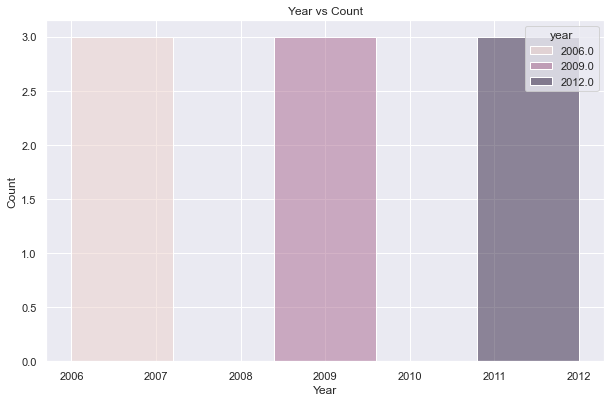

In [324]:
#plt.hist(data=dataset_3, x="year")
fig = sns.histplot(data=dataset_3, x="year", hue="year")

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year vs Count")
plt.savefig('Histogram of Dataset 3.png', format='png')
plt.show(fig)

We can see from the histogram that data dispersion is equal among all years.

## Part (a) Density Plots

In [321]:
def plotMultipleDistributionPlots(dataset):
    column_names = dataset.columns
    plt.figure(figsize=(20, 15))
    plt.tight_layout(pad=3.0)
    c=1
    for col in column_names:
        plt.subplot(5,5,c + c)
        plt.title(col)
        sns.kdeplot(dataset_3[col] , bw_method = 0.5, fill = True)
        c = c + 1
    
    plt.title("Density Plots of All Features") # You can comment this line out if you don't need title
    plt.savefig('Distribution Plots of Dataset 3.png', format='png')   
    plt.show()

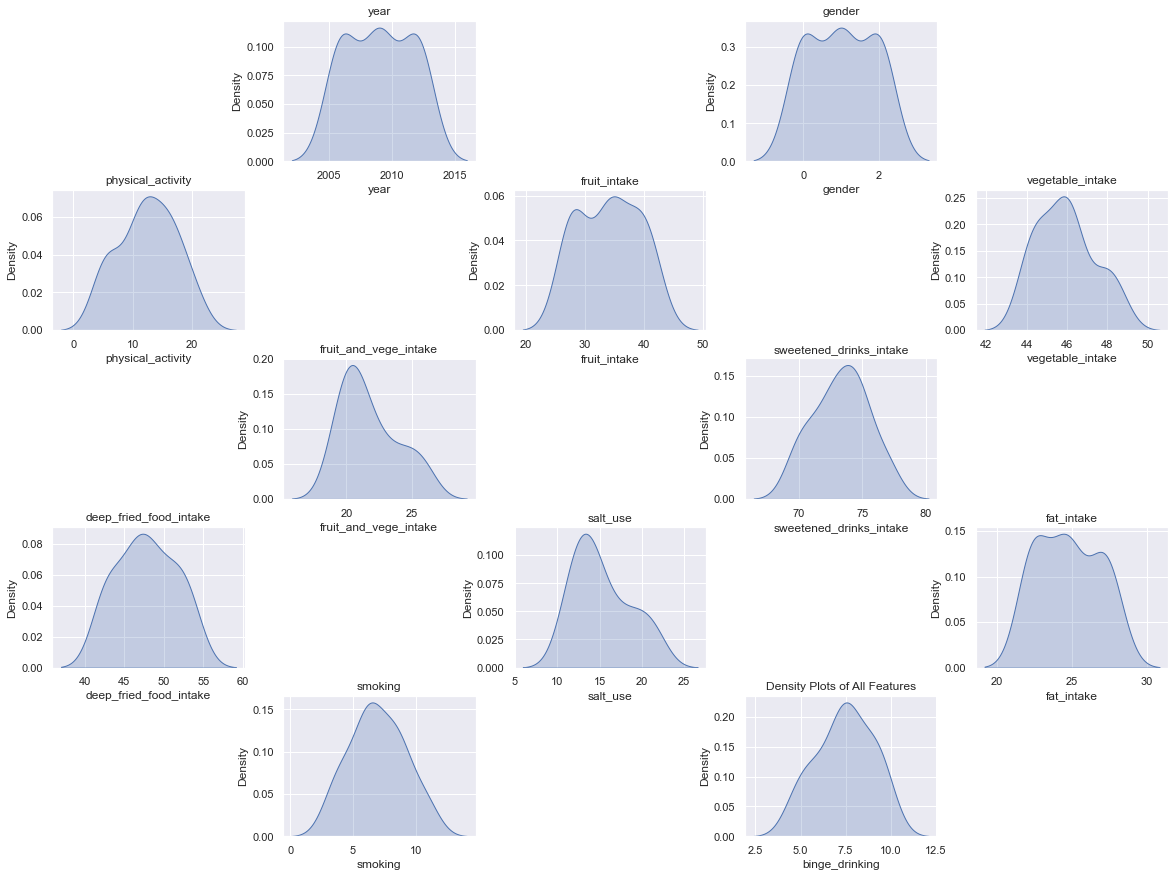

In [323]:
plotMultipleDistributionPlots(dataset_3)

We can clearly see from the density plots that healthy behavior has improved in year2012 and it has more tilt towards the intake of beneficial and nutrients. However, a few things like salt usage and fat intake has increased a lot this year. But, the bright is that intakes and activities that damages the body like smoking, binge_drinking, fried foods and sweet drinks has less density.

## Pair Plot of dataset

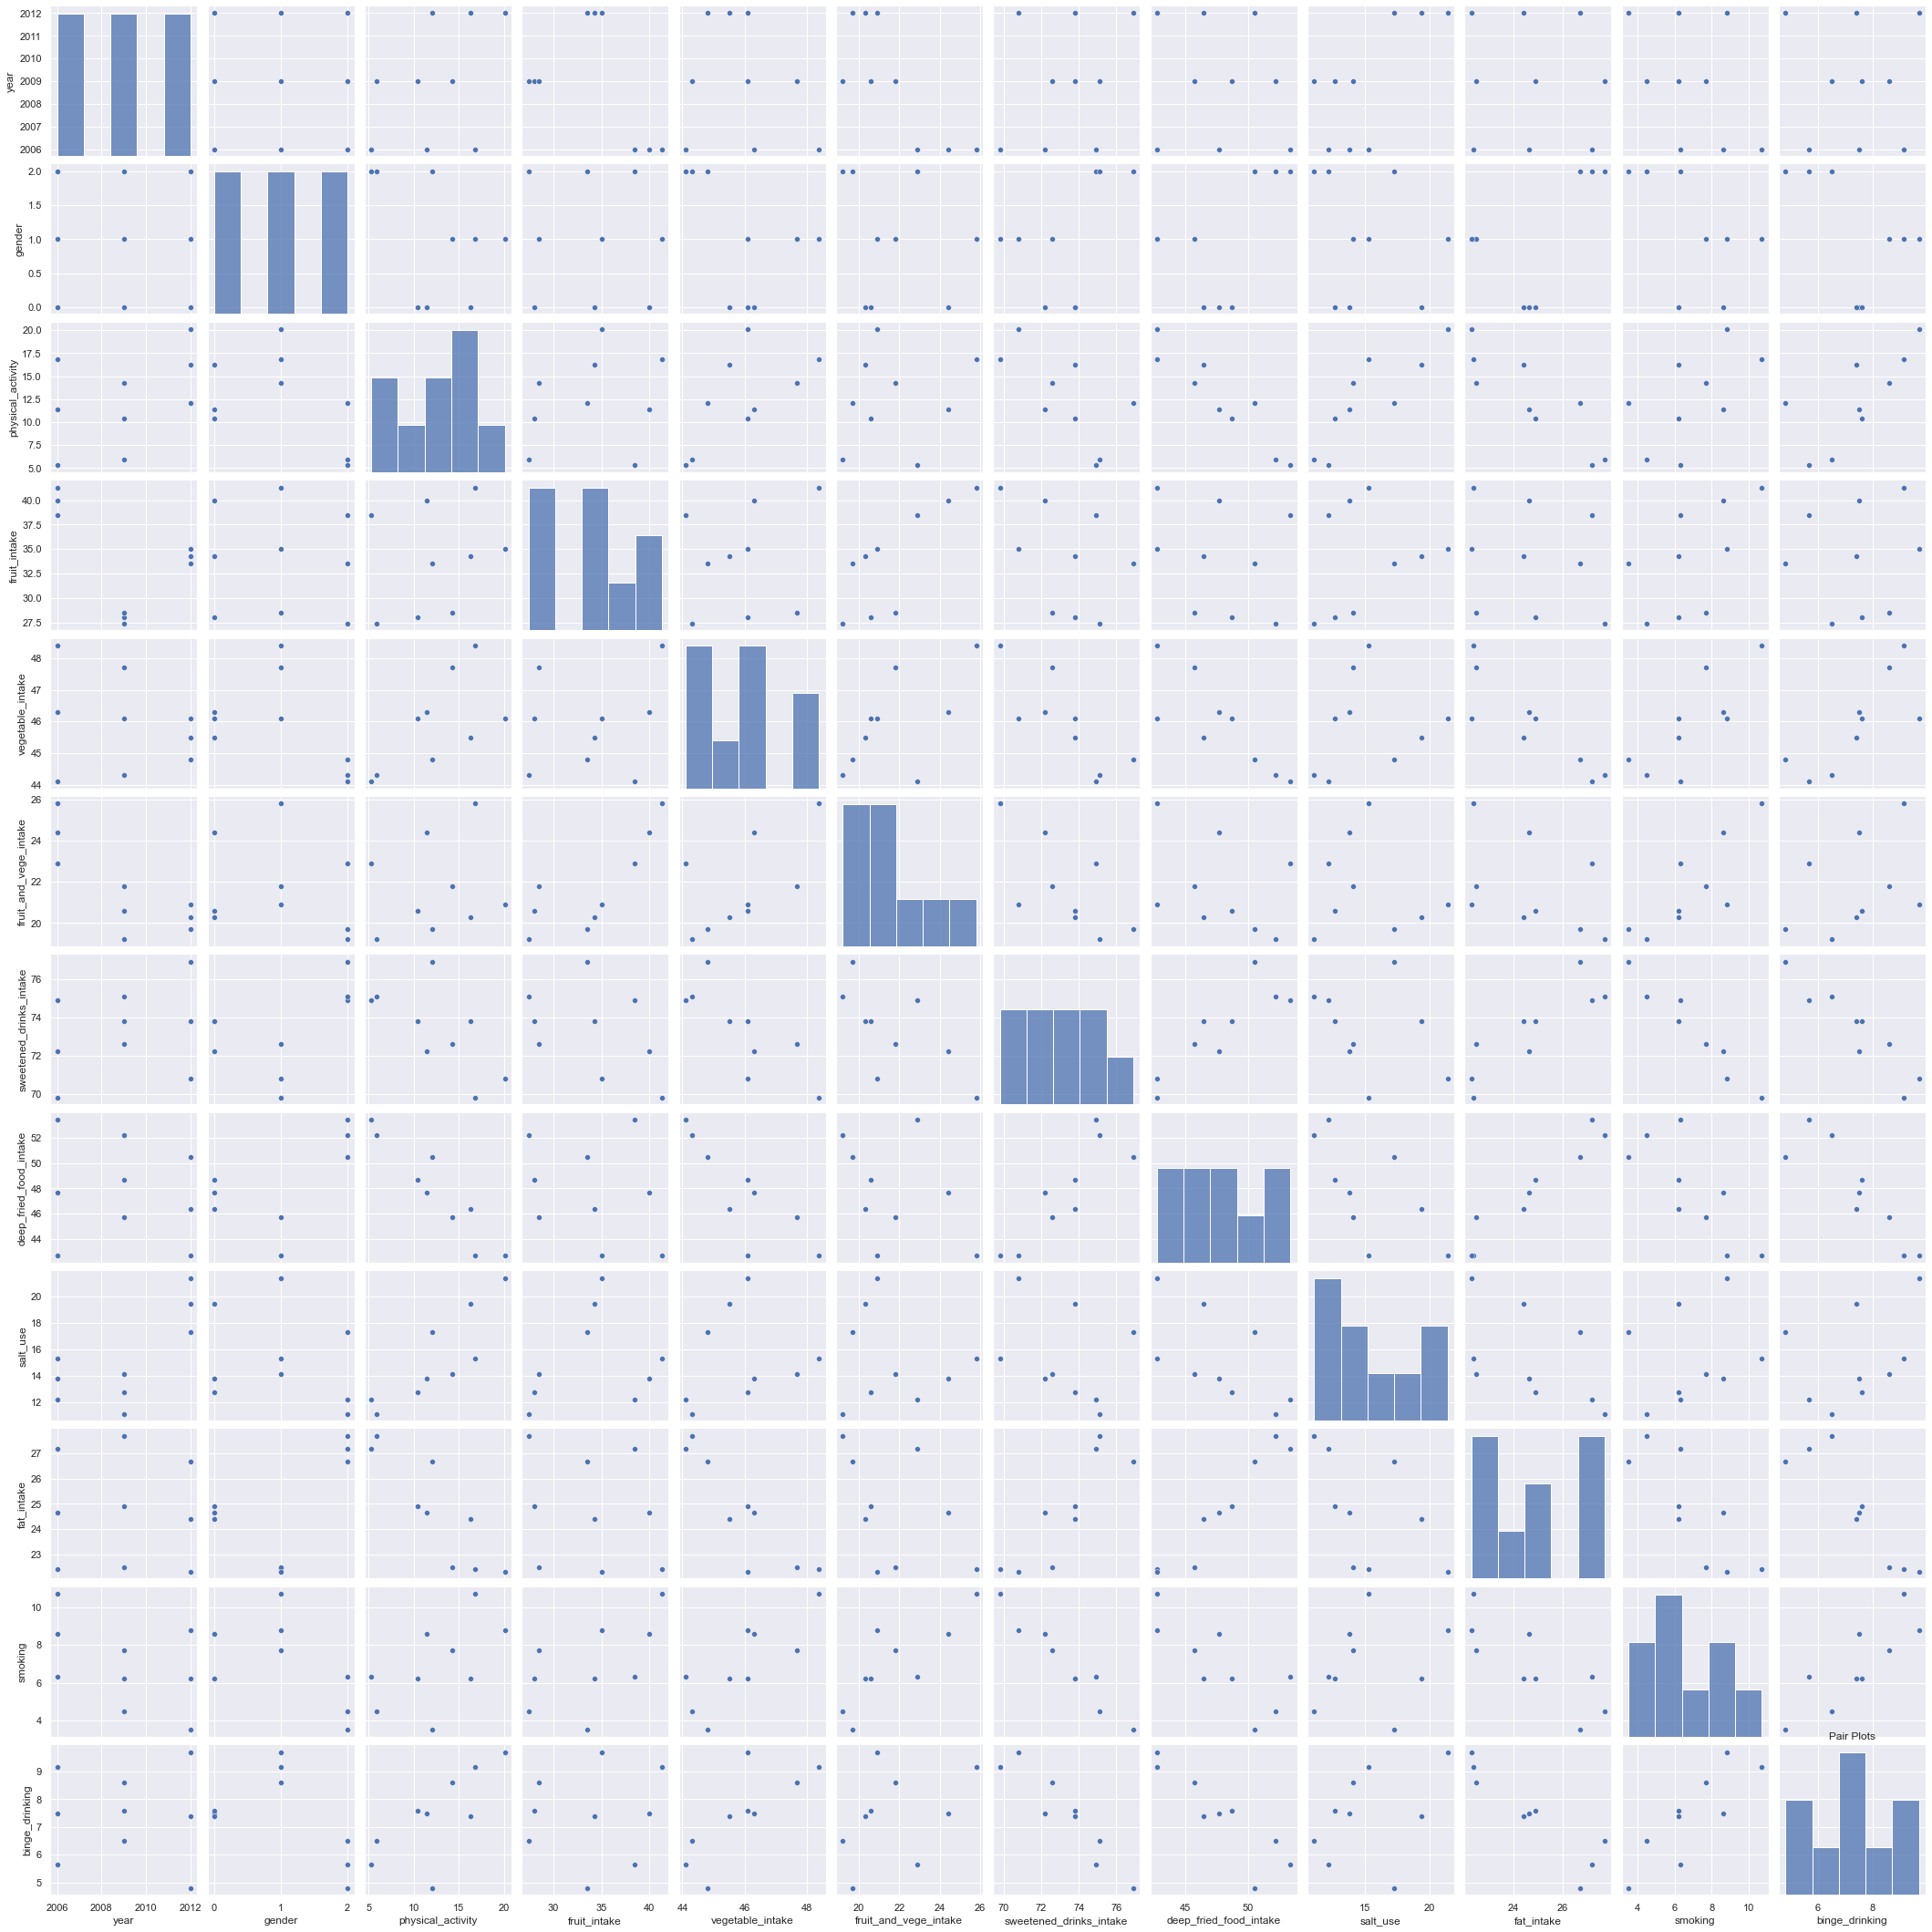

In [326]:
fig = sns.pairplot(dataset_3)
plt.title("Pair Plots")
plt.savefig('Pair Plot of Dataset 3.png', format='png')
plt.show(fig)

## Part (a) Correlation Plot

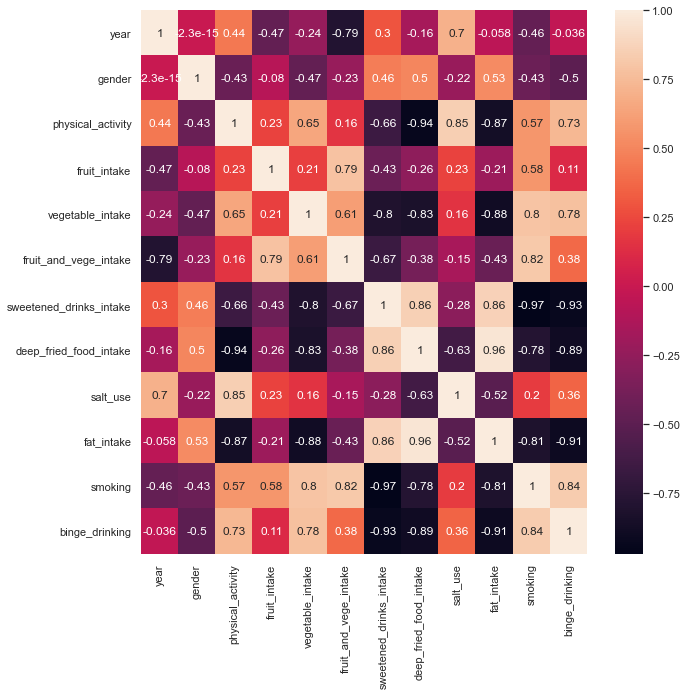

In [327]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset_3.corr(), annot = True)
plt.savefig('Correlation Plot of Dataset 3.png', format='png')
plt.show()

1. We can see our correlation plot of the dataset and find out that salt usage is positively correlated with year so if year increases the salt usage increases.

2. Gender is correlated but not that strongly with sweetened drinks, frid food and fat intake.

3. Other variables like physical activity is correlated with salt usage and binge drinking, fruit and vegetal intake is correlated with smoking,fat intake is highly and positively correlated with fat intake and more.

4. More details can be extracted from the above heatmap our dataset_3 correlation matrix.

## Part (a) Correlation with value > 0.5

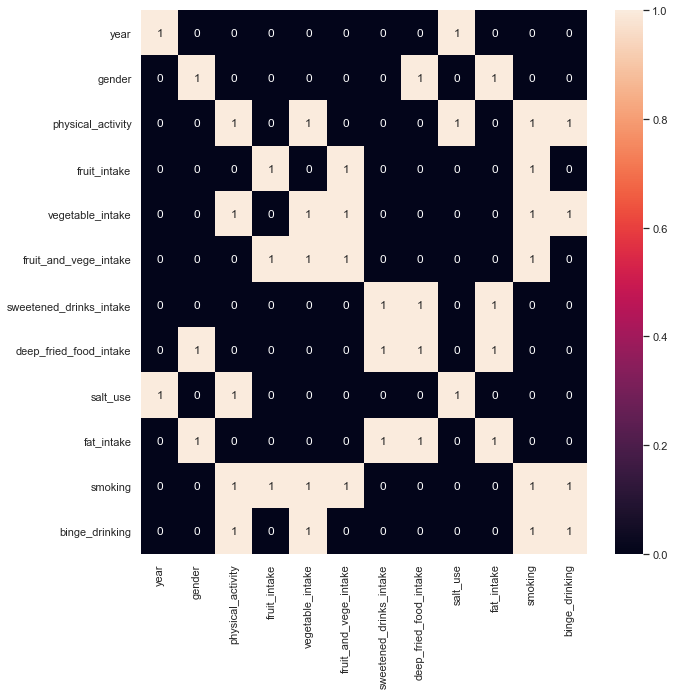

In [328]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset_3.corr() > 0.5, annot = True)
plt.savefig('Correlation Plot of (Highly Correlated) Dataset 3.png', format='png')
plt.show()

From above heatmap, we plotted on those columns two where correlation value is postively stronger than 0.5.

## Part (b) Statistical Signifiance of three variables (physical_activity ,deep_fried_food_intake, smoking) in proportional to male and female for each year and whole dataset

In [329]:
selectedFeatures = ["physical_activity" ,"deep_fried_food_intake", "smoking"]
years = [2006 ,2009, 2012]

From the dataset, We can see that the male and female proporations in each year are of size one hence, we cannot apply a t test or any other test to check the significane of difference between two means so we will just use simple mean for each feature.

### Simple Mean

In [330]:
for eachFeature in selectedFeatures:
    print("Statistical Signifance For Feature:",eachFeature)
    print()
    for eachYear in years:
        print("Statistical Signifance For Year:",eachYear)
        print("------------------------------------------")
        # male group
        male = dataset_3[(dataset_3['year'] == eachYear) & (dataset_3['gender'] == 1.0)][eachFeature]

        # female
        female = dataset_3[(dataset_3['year'] == eachYear) & (dataset_3['gender'] == 2.0)][eachFeature]
        
        
        # mean of male
        mean_male = statistics.mean(male)

        #mean of female
        mean_female = statistics.mean(female)
        
        print("Male Mean:",mean_male," Female Mean:",mean_female)
        if abs(mean_male - mean_female) > 0.05:
            print("We can see from the above means that two proportaions male and female in physical activity are significantly different.")
        else:
             print("We can see from the above means that two proportaions male and female in physical activity are not significantly different.")
          
        print()
    print("\n----------------------------------------------------------------------------------------------------------------------")
    

Statistical Signifance For Feature: physical_activity

Statistical Signifance For Year: 2006
------------------------------------------
Male Mean: 16.8  Female Mean: 5.3
We can see from the above means that two proportaions male and female in physical activity are significantly different.

Statistical Signifance For Year: 2009
------------------------------------------
Male Mean: 14.3  Female Mean: 5.9
We can see from the above means that two proportaions male and female in physical activity are significantly different.

Statistical Signifance For Year: 2012
------------------------------------------
Male Mean: 20.1  Female Mean: 12.1
We can see from the above means that two proportaions male and female in physical activity are significantly different.


----------------------------------------------------------------------------------------------------------------------
Statistical Signifance For Feature: deep_fried_food_intake

Statistical Signifance For Year: 2006
------------------

### Apply T Test to find signicance of difference of each selected feature in proporation of males and females in whole dataset

In [331]:
selectedFeatures.append("gender")
newDataset = dataset_3[(dataset_3['gender'] == 1.0)  | (dataset_3['gender'] == 2.0)][selectedFeatures]
newDataset

,physical_activity,deep_fried_food_intake,smoking,gender
1,16.8,42.7,10.7,1.0
2,5.3,53.4,6.3,2.0
4,14.3,45.7,7.7,1.0
5,5.9,52.2,4.5,2.0
7,20.1,42.7,8.8,1.0
8,12.1,50.5,3.5,2.0


In [332]:
# t test using bioinfokit
res = stat()
for eachSelectedFeature in selectedFeatures:
    
    if eachSelectedFeature != "gender":
        print("--------------------------------------------------------")
        print("Statistical Signifance For Feature:",eachSelectedFeature)
        print("--------------------------------------------------------")
        # for unequal variance t-test (Welch's t-test) set evar=False
        res.ttest(df=newDataset, xfac="gender", res=eachSelectedFeature, test_type=2)
        print(res.summary)
        
    print()


--------------------------------------------------------
Statistical Signifance For Feature: physical_activity
--------------------------------------------------------

Two sample t-test with equal variance

------------------  ----------
Mean diff            9.3
t                    3.38561
Std Error            2.74692
df                   4
P-value (one-tail)   0.0138209
P-value (two-tail)   0.0276417
Lower 95.0%          1.67333
Upper 95.0%         16.9267
------------------  ----------

Parameter estimates

  Level    Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
      1         3  17.0667     2.90918      1.67962        9.83986        24.2935
      2         3   7.76667    3.76475      2.17358       -1.58549        17.1188


--------------------------------------------------------
Statistical Signifance For Feature: deep_fried_food_intake
-------------------------------------

#### Concludion
We can see from the above tests for each selected feature that p-values is less than the normal significance level of 0.05, Hence, we conclude that for each selected, the high significance of the difference in proportions of male and
female students is found.




#### Method
In this significance testing, we are using t test that is used to compare the mean difference between two groups. In this case the two groups are male and female students. The comparsion is done for each selected feature (physical_activity	deep_fried_food_intake and smoking) and the results can be seen from above test results. However, there are other test that can be performed including anova and more.